## Looking at some CME data

In [1]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Defining the path for the dataframe
dataframe = 'C:/Users/Peter/py_projects/solar_stats/cdaw_cme_flare_ar_smart_database.p'

# Importing the dataframe 
df = pd.read_pickle(dataframe)

### CME Halo's

In [3]:
cme_times = df['cme_time']
cme_halos = df['cme_halo']

# Checking for NaN values
print(cme_times.isnull().values.any())
print(cme_halos.isnull().values.any())

False
False


{'I': 27613, 'II': 1334, 'IV': 778, 'III': 503}


<AxesSubplot:>

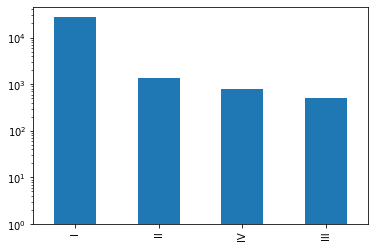

In [4]:
# Simple bar plot to show the range of CME halo classes
halo_ct = cme_halos.value_counts().to_dict()
print(halo_ct)
cme_halos.value_counts().plot.bar(log=True)

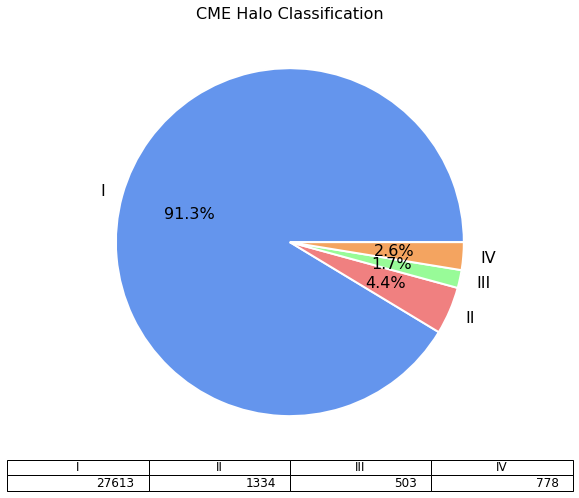

In [5]:
# Pie chart & Table
from pandas.plotting import table

# Reindexing to get the order I want (incresing in halo class)
halo_counts = cme_halos.value_counts()
halo_counts = halo_counts.reindex(index = ['I','II','III', 'IV'])

# Some Pie Chart properties
my_colours=['cornflowerblue','lightcoral','palegreen','sandybrown']
#my_explode = (0, 0.15, 0.15, 0.15)
my_explode = (0, 0, 0, 0)

plt.figure(figsize=(8,8), facecolor='white')
ax1 = plt.plot(aspect='equal')
pie = halo_counts.plot.pie(autopct='%1.1f%%', fontsize=16, label="", table=True, colors=my_colours, explode=my_explode, 
                           shadow=False, wedgeprops={'linewidth':2, 'edgecolor':"white"})

pie.set_title('CME Halo Classification', fontsize=16)
tab = pie.tables[0]
tab.set_fontsize(12)
tab.scale(1.3, 1.3)

#plt.savefig('cme_halo.png', dpi=300, bbox_inches="tight", pad_inches=1)


# Turning something into a series or a dataframe
halo_series = pd.Series(halo_counts, name='Frequency')
halo_df = halo_series.to_frame()

'''
# Table
ax2 = plt.subplot(122)
plt.axis('off')
tbl = table(ax2, halo_df, loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(11)


# Table using matplotlib
ax2.table(cellText = halo_df.values, rowLabels = halo_df.index, colLabels=halo_df.columns, loc="center")
ax2.set_title("Frequency")
'''

plt.show()


## CME Speeds, SMART R-value, WL$_{SG}$  & Flare GOES  Class

In [6]:
# Would be interesting to make plots of cme speed vs SMART r_values and WLsg
cme_speed = df['cme_speed']

# Counting how many valid and NaN entries there are:
print('\033[1m' + 'Valid Entries:')
print('\033[0m')

speed_ct = cme_speed.count()
speed_nan = cme_speed.isnull().sum()
print('CME speed:  ' + str(speed_ct) + ' with ' + str(speed_nan) + ' NaNs' )

wlsg_ct = df['smart_wlsg'].count()
wlsg_nan = df['smart_wlsg'].isnull().sum()
print('WLsg:       ' + str(wlsg_ct) + ' with ' + str(wlsg_nan) + ' NaNs' )

rvalue_ct = df['smart_r_value'].count()
rvalue_nan = df['smart_r_value'].isnull().sum()
print('R-value:    ' + str(rvalue_ct) + ' with ' + str(rvalue_nan) + ' NaNs' )

goes_ct = df['flare_goes_class'].count()
goes_nan = df['flare_goes_class'].isnull().sum()
print('GOES Class: ' + str(goes_ct) + ' with ' + str(goes_nan) + ' NaNs' )

Valid Entries:

CME speed:  30125 with 103 NaNs
WLsg:       6681 with 23547 NaNs
R-value:    6681 with 23547 NaNs
GOES Class: 10786 with 19442 NaNs


In [7]:
# Need to remove NaNs ---> only interested in the 3 columns so making a new dataframe for these
df2 = df[["cme_speed", "smart_r_value", "smart_wlsg", 'flare_goes_class', 'smart_total_flux']]

# Removing the rows containing any NaN values
df2 = df2.dropna(how='any')
df2

,cme_speed,smart_r_value,smart_wlsg,flare_goes_class,smart_total_flux
79,477.0,837803.06,16166785.00,C8.6,1.41e+23
101,469.0,5284.00,1230.71,C2.3,4.85e+21
107,354.0,3472.00,535.87,B2.3,2.73e+21
173,272.0,16358.65,23481.70,B1.6,1.32e+22
174,312.0,16784.24,25997.32,B6.6,1.29e+22
...,...,...,...,...,...
29690,93.0,30690.80,50067.10,B2.5,1.22e+22
29691,338.0,20444.30,32469.57,B6.5,1.16e+22
29692,306.0,11323.36,24809.39,C1.4,1.02e+22
29693,278.0,11323.36,24809.39,C1.4,1.02e+22


### Simple Scatter Plot: R values

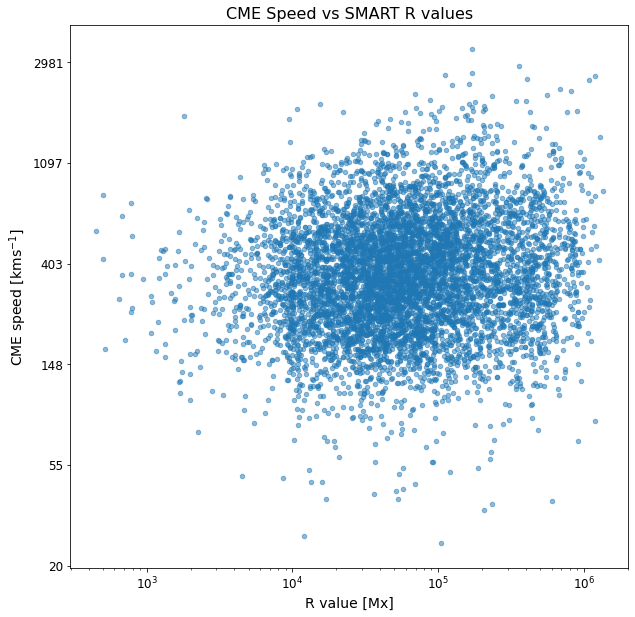

In [8]:
# Plotting with x-axis on a log10 scale, y-axis on a log scale
ax2 = df2.plot.scatter(x='smart_r_value', y='cme_speed', alpha=0.5, figsize=(10,10), fontsize=12)
ax2.set_title('CME Speed vs SMART R values', fontsize=16)
ax2.set_xlabel("R value [Mx]", fontsize=14)
ax2.set_ylabel("CME speed [kms$^{-1}$]", fontsize=14)
ax2.set_xscale("log", base=10)
ax2.set_yscale("log", base=np.e)

from matplotlib.ticker import ScalarFormatter
ax2.yaxis.set_major_formatter(ScalarFormatter())

#plt.savefig('r_values.png', dpi=300, bbox_inches="tight", pad_inches=1)

'''
# Changing the log ticks format
from matplotlib.ticker import FixedLocator, FixedFormatter

x_formatter = FixedFormatter(['3','4','5','6'])
y_formatter = FixedFormatter(['100','2','3','4','5','6','7','8','9','1000','2000' ])
ax2.xaxis.set_major_formatter(x_formatter)
ax2.yaxis.set_major_formatter(y_formatter)

x_locator = FixedLocator([1e3,1e4,1e5,1e6])
y_locator = FixedLocator([100,200,300,400,500,600,700,800,900,1000,2000])
ax2.xaxis.set_major_locator(x_locator)
ax2.yaxis.set_major_locator(y_locator)
'''

plt.show()

### Simple Scatter Plot: WLsg 

In [9]:
# There are a lot of zero's in the WLSG column ---> let's remove these by dropping those rows
df3 = df2[(df2[['smart_wlsg']] != 0).all(axis=1)]
df3

# Created a boolean DataFrame by comparing all filtered column values by a scalar for NOT equality and then checked all the 
# boolean Trues per row by all 

,cme_speed,smart_r_value,smart_wlsg,flare_goes_class,smart_total_flux
79,477.0,837803.06,16166785.00,C8.6,1.41e+23
101,469.0,5284.00,1230.71,C2.3,4.85e+21
107,354.0,3472.00,535.87,B2.3,2.73e+21
173,272.0,16358.65,23481.70,B1.6,1.32e+22
174,312.0,16784.24,25997.32,B6.6,1.29e+22
...,...,...,...,...,...
29690,93.0,30690.80,50067.10,B2.5,1.22e+22
29691,338.0,20444.30,32469.57,B6.5,1.16e+22
29692,306.0,11323.36,24809.39,C1.4,1.02e+22
29693,278.0,11323.36,24809.39,C1.4,1.02e+22


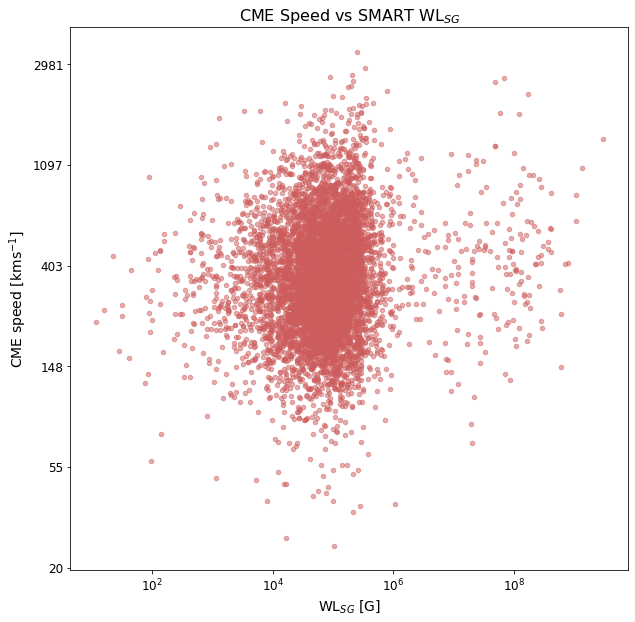

In [10]:
# Plotting with x-axis on a log10 scale, y-axis on a log scale
ax3 = df3.plot.scatter(x='smart_wlsg', y='cme_speed', alpha=0.5, figsize=(10,10), fontsize=12, color='indianred')
ax3.set_title('CME Speed vs SMART WL$_{SG}$', fontsize=16)
ax3.set_xlabel("WL$_{SG}$ [G]", fontsize=14)
ax3.set_ylabel("CME speed [kms$^{-1}$]", fontsize=14)
ax3.set_xscale("log", base=10)
ax3.set_yscale("log", base=np.e)

ax3.yaxis.set_major_formatter(ScalarFormatter())

#plt.savefig('wlsg.png', dpi=300, bbox_inches="tight", pad_inches=1)

plt.show()

### Flare GOES Class

In [11]:
df2['flare_goes_class'] #Need to split this column into 2 to separate the class form the flux value

""" The pattern ([a-zA-Z]+)([^a-zA-Z]+) means match a group of letters: ([a-zA-Z]+) followed by a group 
    of non letters: ([^a-zA-Z]+) """

goes_split = df2.flare_goes_class.str.extract('([a-zA-Z]+)([^a-zA-Z]+)', expand=True)
goes_split.columns = ["goes_class", "goes_flux"]

In [12]:
# Adding these new columns into df2 
df2['goes_class'] = goes_split['goes_class']
df2['goes_flux'] = goes_split['goes_flux']
df2

,cme_speed,smart_r_value,smart_wlsg,flare_goes_class,smart_total_flux,goes_class,goes_flux
79,477.0,837803.06,16166785.00,C8.6,1.41e+23,C,8.6
101,469.0,5284.00,1230.71,C2.3,4.85e+21,C,2.3
107,354.0,3472.00,535.87,B2.3,2.73e+21,B,2.3
173,272.0,16358.65,23481.70,B1.6,1.32e+22,B,1.6
174,312.0,16784.24,25997.32,B6.6,1.29e+22,B,6.6
...,...,...,...,...,...,...,...
29690,93.0,30690.80,50067.10,B2.5,1.22e+22,B,2.5
29691,338.0,20444.30,32469.57,B6.5,1.16e+22,B,6.5
29692,306.0,11323.36,24809.39,C1.4,1.02e+22,C,1.4
29693,278.0,11323.36,24809.39,C1.4,1.02e+22,C,1.4


In [13]:
# SunPy package to convert flare class to a flux!
from sunpy.instr.goes import flareclass_to_flux
flareclass_to_flux('X20.0')

<Quantity 0.002 W / m2>

In [14]:
# The flux is a string ---> must convert to a float
#df2['goes_flux'] = df2['goes_flux'].astype(float)   #Looks like there is some data inputted incorrectly eg. 7,4 (shoud be 7.4)

# Checking the indicies in which this mistake occurs
print(df2[df2['goes_flux']=='7,4'].index.values)

# Going to replace each value of 7,4 with 7.4
df2['goes_flux'] = df2['goes_flux'].replace(['7,4'],'7.4')

[5433 5434]


In [15]:
# Converting string flux values to a float, hopefully correctly this time!
df2['goes_flux'] = df2['goes_flux'].astype(float)

In [16]:
# Now multiplying the flux values by the relevant power for its GOES class
df2.loc[df2.goes_class == 'A', 'goes_flux'] *= 1e-8
df2.loc[df2.goes_class == 'B', 'goes_flux'] *= 1e-7
df2.loc[df2.goes_class == 'C', 'goes_flux'] *= 1e-6
df2.loc[df2.goes_class == 'M', 'goes_flux'] *= 1e-5
df2.loc[df2.goes_class == 'X', 'goes_flux'] *= 1e-4

In [17]:
df2

,cme_speed,smart_r_value,smart_wlsg,flare_goes_class,smart_total_flux,goes_class,goes_flux
79,477.0,837803.06,16166785.00,C8.6,1.41e+23,C,8.600000e-06
101,469.0,5284.00,1230.71,C2.3,4.85e+21,C,2.300000e-06
107,354.0,3472.00,535.87,B2.3,2.73e+21,B,2.300000e-07
173,272.0,16358.65,23481.70,B1.6,1.32e+22,B,1.600000e-07
174,312.0,16784.24,25997.32,B6.6,1.29e+22,B,6.600000e-07
...,...,...,...,...,...,...,...
29690,93.0,30690.80,50067.10,B2.5,1.22e+22,B,2.500000e-07
29691,338.0,20444.30,32469.57,B6.5,1.16e+22,B,6.500000e-07
29692,306.0,11323.36,24809.39,C1.4,1.02e+22,C,1.400000e-06
29693,278.0,11323.36,24809.39,C1.4,1.02e+22,C,1.400000e-06


In [18]:
# CAREFUL: I logged the goes_flux, don't run this again!!
df2['goes_flux'] = np.log10(df2['goes_flux'])

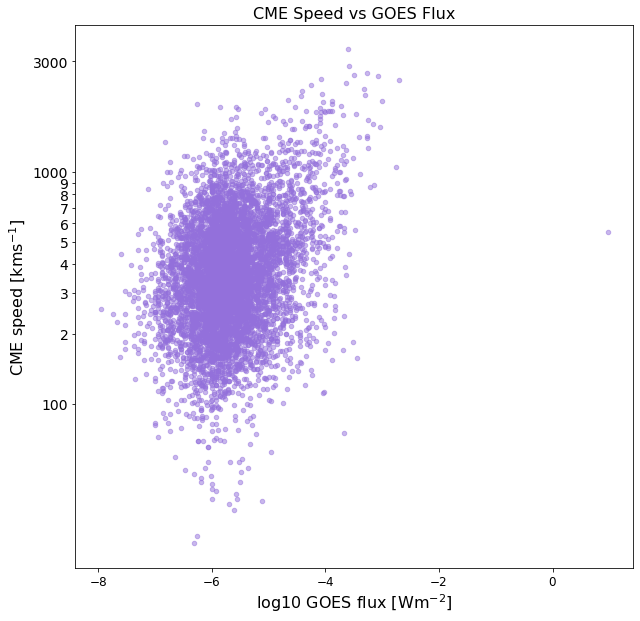

In [127]:
# Plotting speed vs GOES flux
ax4 = df2.plot.scatter(x='goes_flux', y='cme_speed', alpha=0.5, figsize=(10,10), fontsize=12, color='mediumpurple')
ax4.set_title('CME Speed vs GOES Flux', fontsize=16)
ax4.set_xlabel("log10 GOES flux [Wm$^{-2}$]", fontsize=16)
ax4.set_ylabel("CME speed [kms$^{-1}$]", fontsize=16)
#ax4.set_xscale("log", base=10)
ax4.set_yscale("log", base=np.e)

#ax4.yaxis.set_major_formatter(ScalarFormatter())

ax4.set_yticks([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 3000])
ax4.set_yticklabels([r'100', r'2', r'3', r'4', r'5', r'6', r'7', r'8', r'9', r'1000', r'3000'], fontsize=14)

#plt.savefig('flux_w_outlier.png', dpi=300, bbox_inches="tight", pad_inches=1)

plt.show()

In [20]:
# Let's get rid of the outlier
print(max(df2['goes_flux']))

# Creating a copy of the dataframe for ease
df2_copy = df2.copy()

# Finding it's index
max_index = df2_copy['goes_flux'].idxmax()
print(max_index)

# Need to reindex the dataframe so that it's numbered correctly
df2_copy = df2_copy.reset_index()

0.9777236052888477
14524


In [21]:
# Getting the new (and correct) index
max_index2 = df2_copy['goes_flux'].idxmax()
print(max_index2)

# Now to remove this row
df2_copy = df2_copy.drop(df2_copy.index[2738])

print(max(df2_copy['goes_flux']))

2738
-2.6989700043360187


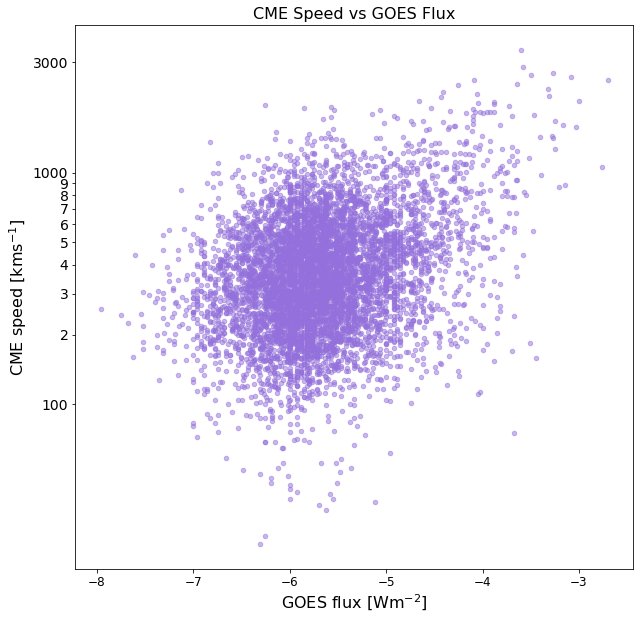

In [129]:
# Re-plotting
ax5 = df2_copy.plot.scatter(x='goes_flux', y='cme_speed', alpha=0.5, figsize=(10,10), fontsize=12, color='mediumpurple')
ax5.set_title('CME Speed vs GOES Flux', fontsize=16)
ax5.set_xlabel("GOES flux [Wm$^{-2}$]", fontsize=16)
ax5.set_ylabel("CME speed [kms$^{-1}$]", fontsize=16)
#ax5.set_xscale("log", base=10)
ax5.set_yscale("log", base=np.e)

#ax5.yaxis.set_major_formatter(ScalarFormatter())

ax5.set_yticks([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 3000])
ax5.set_yticklabels([r'100', r'2', r'3', r'4', r'5', r'6', r'7', r'8', r'9', r'1000', r'3000'], fontsize=14)

#plt.savefig('goes_flux.png', dpi=300, bbox_inches="tight", pad_inches=1)

plt.show()

### Let's try to colour code the CME class

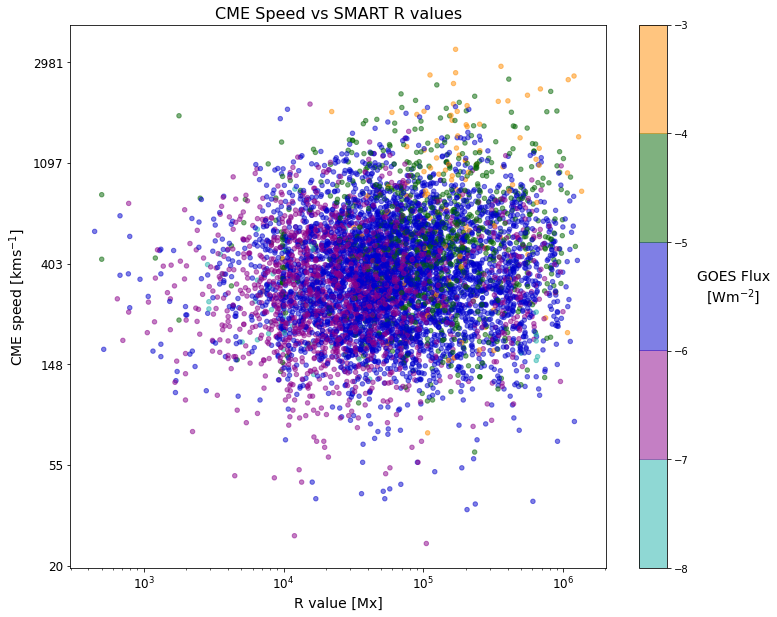

In [23]:
# Creating a custom colormap
import matplotlib as mpl
cmap = mpl.colors.ListedColormap(['lightseagreen','darkmagenta', 'mediumblue', 'darkgreen', 'darkorange'])
bounds=[-8,-7,-6,-5,-4,-3]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# Plotting R values
ax6 = df2_copy.plot.scatter(x='smart_r_value', y='cme_speed', c='goes_flux', alpha=0.5, figsize=(12,10), fontsize=12, 
                                                            cmap=cmap, norm=norm,  sharex=False)
ax6.set_title('CME Speed vs SMART R values', fontsize=16)
ax6.set_xlabel("R value [Mx]", fontsize=14)
ax6.set_ylabel("CME speed [kms$^{-1}$]", fontsize=14)
ax6.set_xscale("log", base=10)
ax6.set_yscale("log", base=np.e)

ax6.yaxis.set_major_formatter(ScalarFormatter())

# Re-labelling the colorbar
f = plt.gcf()
f.get_axes()
cax = f.get_axes()[1]
cax.set_ylabel('GOES Flux\n[Wm$^{-2}$]', fontsize=14, rotation=0, labelpad=45, y=0.55)

#plt.savefig('r_values_flux.png', dpi=300, bbox_inches="tight", pad_inches=1)

plt.show()

In [52]:
# Uncovered a PROBLEM: Had to convert smart_total_flux into a float
test = df[['smart_total_flux']]
test = test.dropna(how='any')
print(max(test.smart_total_flux))
x = test.loc[test.smart_total_flux == '1.41e+23']
y=test.max()

test['smart_total_flux'] = test['smart_total_flux'].astype(float)
print(max(test.smart_total_flux))

9.9e+22
4.39e+23


In [53]:
# Fixing ^
df2_copy['smart_total_flux'] = df2_copy['smart_total_flux'].astype(float)

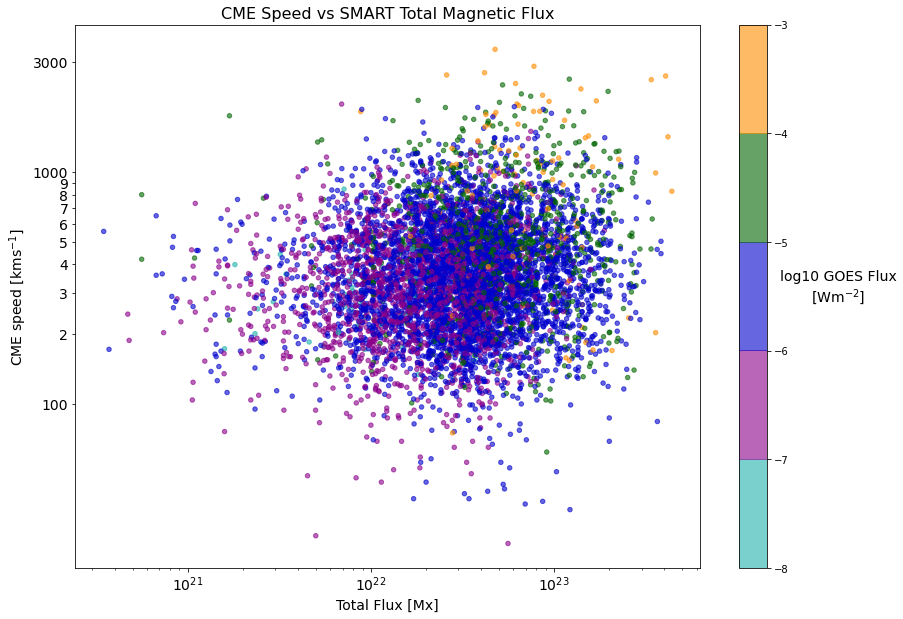

In [120]:
# Plotting SMART total flux ---> No need to use pandas plotting tools!

fig = plt.figure(figsize=[14,10])
sct = plt.scatter(x=df2_copy['smart_total_flux'], y=df2_copy['cme_speed'], c=df2_copy['goes_flux'], alpha=0.5, 
                                                            cmap=cmap, norm=norm)
plt.title('CME Speed vs SMART Total Magnetic Flux', fontsize=16)
plt.xlabel("Total Flux [Mx]", fontsize=14)
plt.ylabel("CME speed [kms$^{-1}$]", fontsize=14)
#plt.ylim([20,3000])
plt.xscale("log")
plt.yscale("log", base=np.e)


cbar = fig.colorbar(sct)
cbar.set_label('log10 GOES Flux\n[Wm$^{-2}$]', fontsize=14, rotation=0, labelpad=50, y=0.55)

plt.yticks(ticks=[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 3000], 
           labels=[r'100', r'2', r'3', r'4', r'5', r'6', r'7', r'8', r'9', r'1000', r'3000'], fontsize=14)

plt.xticks(ticks=[1e21, 1e22, 1e23], 
           labels=[r'10$^{21}$', r'10$^{22}$', r'10$^{23}$'], fontsize=14)


#ax7.set_xscale("log", base=10)
#ax7.set_yscale("log", base=np.e)


#plt.savefig('smart_total_flux.png', dpi=300, bbox_inches="tight", pad_inches=1)

plt.show()

### Let's look at how many A/B/C/M/X class flares there are

In [30]:
class_counts = df2_copy['goes_class'].value_counts()
class_counts = class_counts.reindex(index=['A','B','C','M','X'])
class_counts

A      65
B    1832
C    3791
M     870
X     108
Name: goes_class, dtype: int64

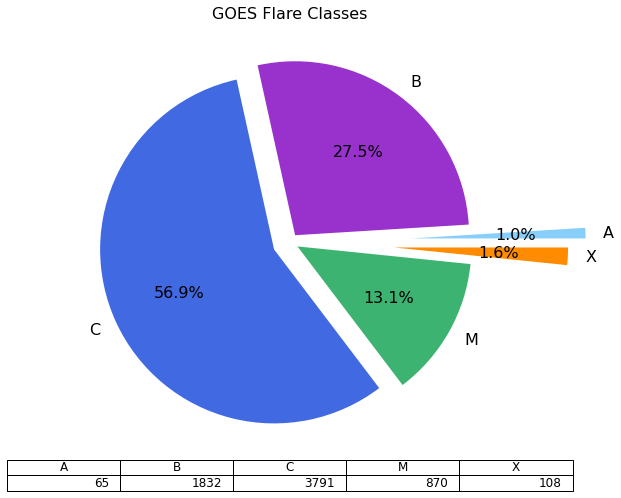

In [31]:
# Pie chart & Table

# Some Pie Chart properties
class_col=['lightskyblue','darkorchid', 'royalblue', 'mediumseagreen', 'darkorange']
my_explode = (0.7,0.05,0.1,0.05,0.6)
#my_explode = (0,0,0,0,0)

plt.figure(figsize=(8,8), facecolor='white')
ax7 = plt.plot(aspect='equal')
pie2 = class_counts.plot.pie(autopct='%1.1f%%', textprops={'color':"black"}, fontsize=16, 
                             label="", table=True, colors=class_col, explode=my_explode, shadow=False)

pie2.set_title('GOES Flare Classes', fontsize=16)
tab2 = pie2.tables[0]
tab2.set_fontsize(12)
tab2.scale(1.3, 1.3)

#plt.savefig('flare_classes.png', dpi=300, bbox_inches="tight", pad_inches=1)

plt.show()

In [39]:
print(df.flare_goes_class[5433])
print(df.flare_type[5433])
print(df.flare_start_time[5433])

C7,4
swpc
2002-01-13 15:12:00


In [38]:
print(df.flare_goes_class[5434])
print(df.flare_type[5434])
print(df.flare_start_time[5434])

C7,4
swpc
2002-01-13 15:12:00


In [141]:
# How many flares
df_new = df.copy()
type_ct = df_new['flare_type'].count()
type_nan = df_new['flare_type'].isnull().sum()
print('Flare Type: ' + str(type_ct) + ' with ' + str(type_nan) + ' NaNs' )

Flare Type: 16552 with 13676 NaNs


In [142]:
# How many CMEs
cme_ct = df_new['cme_time'].count()
cme_nan = df_new['cme_time'].isnull().sum()
print('CME count: ' + str(cme_ct) + ' with ' + str(cme_nan) + ' NaNs' )

CME count: 30228 with 0 NaNs


In [143]:
# Removing Flare NaNs
df_flares = df_new[['flare_type']]

# Removing the rows containing any NaN values
df_flares = df_flares.dropna(how='any')

# Counting different types
flare_type = df_flares.value_counts().to_dict()
print(flare_type)

{('swpc',): 8288, ('rhessi',): 6293, ('lmsal',): 1971}


In [144]:
test = df_new[['flare_type', 'flare_goes_class']]
test = test.dropna(how='any')
print(test['flare_type'].value_counts().to_dict())

{'swpc': 8288, 'lmsal': 1971, 'rhessi': 527}


In [145]:
# SRS
srs_hale_ct = df_new['srs_hale'].count()
srs_hale_nan = df_new['srs_hale'].isnull().sum()
print('SRS Hale Class: ' + str(srs_hale_ct) + ' with ' + str(srs_hale_nan) + ' NaNs' )

srs_time_ct = df_new['srs_observation_time'].count()
srs_time_nan = df_new['srs_observation_time'].isnull().sum()
print('SRS Hale Class: ' + str(srs_time_ct) + ' with ' + str(srs_time_nan) + ' NaNs' )

SRS Hale Class: 7385 with 22843 NaNs
SRS Hale Class: 7385 with 22843 NaNs


In [146]:
# SMART Regions
smart_time_ct = df_new['smart_observation_time'].count()
smart_time_nan = df_new['smart_observation_time'].isnull().sum()
print('SMART Regions: ' + str(smart_time_ct) + ' with ' + str(smart_time_nan) + ' NaNs' )

SMART Regions: 6681 with 23547 NaNs


In [147]:
# CME width and speed
df_speed_width = df_new[['cme_speed', 'cme_width', 'cme_halo']]
df_speed_width = df_speed_width.dropna(how='any')
df_speed_width
# Looking at unique values only
#df_speed_width = df_speed_width.drop_duplicates(subset=['cme_width'])
#df_speed_width

,cme_speed,cme_width,cme_halo
0,499.0,35.0,I
1,118.0,82.0,I
2,71.0,26.0,I
4,148.0,68.0,I
5,413.0,42.0,I
...,...,...,...
30223,347.0,52.0,I
30224,204.0,46.0,I
30225,210.0,34.0,I
30226,269.0,39.0,I


In [152]:
# Replacing the non-numeric hale classes with numeric values
df_speed_width["cme_halo"].replace({"I": "1", "II": "2", "III": "3", "IV": "4"}, inplace=True)
df_speed_width["cme_halo"] = df_speed_width["cme_halo"].astype(float)
df_speed_width

,cme_speed,cme_width,cme_halo
0,499.0,35.0,1.0
1,118.0,82.0,1.0
2,71.0,26.0,1.0
4,148.0,68.0,1.0
5,413.0,42.0,1.0
...,...,...,...
30223,347.0,52.0,1.0
30224,204.0,46.0,1.0
30225,210.0,34.0,1.0
30226,269.0,39.0,1.0


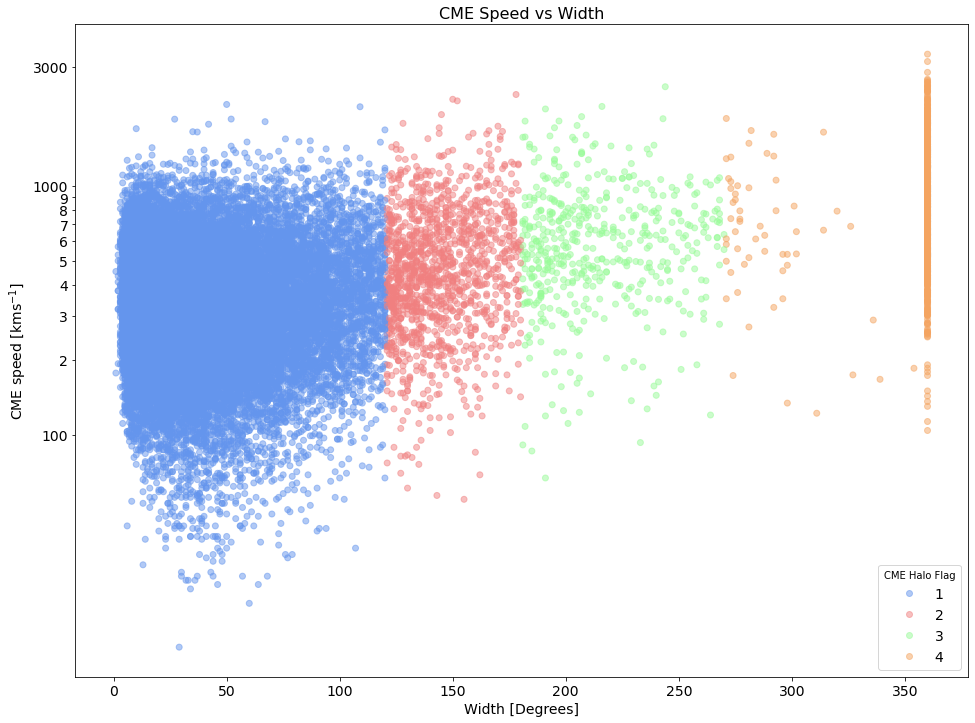

In [171]:
cmap2 = mpl.colors.ListedColormap(['cornflowerblue','lightcoral','palegreen','sandybrown'])
bounds2=[1,2,3,4,5]
norm2 = mpl.colors.BoundaryNorm(bounds2, cmap2.N)

fig2 = plt.figure(figsize=[16,12])
sct2 = plt.scatter(x=df_speed_width['cme_width'], y=df_speed_width['cme_speed'], c=df_speed_width['cme_halo'], alpha=0.5, 
                                                            cmap=cmap2, norm=norm2)
plt.title('CME Speed vs Width', fontsize=16)
plt.xlabel("Width [Degrees]", fontsize=14)
plt.ylabel("CME speed [kms$^{-1}$]", fontsize=14)
#plt.xscale("log")
plt.yscale("log", base=np.e)

plt.xticks(fontsize=14)
plt.yticks(ticks=[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 3000], 
           labels=[r'100', r'2', r'3', r'4', r'5', r'6', r'7', r'8', r'9', r'1000', r'3000'], fontsize=14)

legend1 = plt.legend(*sct2.legend_elements(), loc="lower right", title="CME Halo Flag", fontsize=14)

#plt.savefig('cme_speed_width.png', dpi=300, bbox_inches="tight", pad_inches=1)

plt.show()

In [172]:
# Looking at some flare props, particularly the outlier
df_hale = df[['srs_hale', "srs_area", 'flare_goes_class']]

# Removing the rows containing any NaN values
df_hale = df_hale.dropna(how='any')

#df_hale = df_hale.reset_index()

df_hale


,srs_hale,srs_area,flare_goes_class
71,BETA,0880,C1.2
79,BETA,0580,C8.6
81,BETA,0450,C2.7
100,ALPHA,0010,B5.8
101,ALPHA,0010,C2.3
...,...,...,...
29695,Beta,0240,B2.4
29696,Beta,0240,B2.4
29697,Beta,0160,C6.7
29698,Beta,0160,C6.7


In [173]:
hale_ct = df_hale['srs_hale'].value_counts().to_dict()
print(hale_ct)

{'Beta': 3018, 'Beta-Gamma': 1546, 'Beta-Gamma-Delta': 1134, 'Alpha': 823, 'BETA': 429, 'BETA-GAMMA': 151, 'Beta-Delta': 128, 'ALPHA': 72, 'BETA-GAMMA-DELTA': 62, 'BETA-DELTA': 13, 'GAMMA-DELTA': 7, 'Gamma-Delta': 2}


In [139]:
test = df[['srs_observation_time']]
test = test.dropna(how='any')
test

,srs_observation_time
71,1996-11-26
79,1996-11-30
81,1996-12-02
100,1996-12-19
101,1996-12-19
...,...
29695,2019-05-08
29696,2019-05-08
29697,2019-05-09
29698,2019-05-09


In [36]:
y = df_flares.loc[df_flares.smart_total_flux == '9.9e+22']
y

,flare_peak_time,flare_type,flare_goes_class,smart_total_flux
6935,2002-11-13 18:03:00,swpc,C1.9,9.9e+22
21825,2013-10-28 04:41:00,swpc,M5.1,9.9e+22


In [37]:
z = df_flares.loc[df_flares.flare_goes_class == 'X28']
z

,flare_peak_time,flare_type,flare_goes_class,smart_total_flux
